In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
pd.options.display.float_format = "{:.4f}".format
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D
plt.rcParams["figure.figsize"] = (16,10)
# plt.style.use("~/.dracula.mplstyle")
import seaborn as sns
import datetime as dt
import os, sys, time, asyncio, re
import functools

# Set path
parent_path = os.path.abspath(os.path.join('..'))
if parent_path not in sys.path:
    sys.path.append(parent_path)
# from common.functions import portstats_bm

In [2]:
# .h5 files... don't work...
# pd.read_hdf("../data/2021/Full_Size_Parsed_HDF5/2021-04__ETH-BTC_orders.h5")

DATADIR = "../data/2021/For_Homework/"

books, trades = {}, {}

for filename in os.listdir(DATADIR):
    pair = re.findall(r'[A-Z]{3}-[A-Z]{3}', filename)[0]
    
    if filename[:6]=="trades":
        trades[pair] = pd.read_csv(DATADIR + filename, compression="gzip", sep='\t')
    elif filename[:4]=="book": pass
        # books[pair] = pd.read_csv(DATADIR + filename, compression="gzip", sep='\t')
    else:
        print(f"Not reading {filename}")
        
print(trades.keys())

dict_keys(['ETH-USD', 'BTC-USD', 'ETH-BTC'])


In [3]:
# books["ETH-BTC"]

KeyError: 'ETH-BTC'

In [4]:
trades["ETH-BTC"]

,received_utc_nanoseconds,timestamp_utc_nanoseconds,PriceMillionths,SizeBillionths,Side
0,1618090137140737000,1618090137157544000,35690,1000000,-1
1,1618090137851379000,1618090137864544000,35700,29801980,2
2,1618090143777062000,1618090143793909000,35700,4641070,1
3,1618090155038792000,1618090155053606000,35710,1000000,1
4,1618090155039208000,1618090155053606000,35720,231355690,1
...,...,...,...,...,...
32739,1618270609444614000,1618270609550910000,35780,6917960,1
32740,1618270609827303000,1618270609930738000,35780,182922480,1
32741,1618270610376143000,1618270610482336000,35780,4577180,1
32742,1618270615253262000,1618270615358639000,35760,2926932560,-1


In [5]:
trd_raw = trades["ETH-USD"]
trd_raw

,received_utc_nanoseconds,timestamp_utc_nanoseconds,PriceMillionths,SizeBillionths,Side
0,1618090136259046000,1618090134547039000,2109000000,499500000,1
1,1618090136280332000,1618090134797956000,2109000000,36208850,1
2,1618090136304898000,1618090135123831000,2109000000,499500000,1
3,1618090136346044000,1618090135704667000,2109000000,499400000,1
4,1618090136376357000,1618090136302068000,2109000000,499400000,1
...,...,...,...,...,...
306793,1618285122574293000,1618285122586738000,2165000000,47486920,-1
306794,1618285122766800000,1618285122793465000,2165000000,392226750,-1
306795,1618285122897997000,1618285122923682000,2164560000,10803650,1
306796,1618285123813345000,1618285123836600000,2164450000,70546230,1


In [9]:
counts = trd_raw.groupby("timestamp_utc_nanoseconds").count()
counts[counts["PriceMillionths"]>1]

,received_utc_nanoseconds,PriceMillionths,SizeBillionths,Side
timestamp_utc_nanoseconds,,,,
1618090136621472000,2,2,2,2
1618090157749409000,2,2,2,2
1618090163834291000,2,2,2,2
1618090174269516000,16,16,16,16
1618090178760842000,2,2,2,2
...,...,...,...,...
1618285100596395000,2,2,2,2
1618285106581504000,3,3,3,3
1618285107342924000,2,2,2,2


In [13]:
trd_raw[trd_raw["timestamp_utc_nanoseconds"]==1618090174269516000]

,received_utc_nanoseconds,timestamp_utc_nanoseconds,PriceMillionths,SizeBillionths,Side
66,1618090174318709000,1618090174269516000,2108360000,6115048140,-1
67,1618090174318468000,1618090174269516000,2108420000,3999453440,-1
68,1618090174318206000,1618090174269516000,2108580000,1000000000,-1
69,1618090174317511000,1618090174269516000,2108590000,11483988900,-2
70,1618090174316782000,1618090174269516000,2108600000,2000000000,-1
71,1618090174316549000,1618090174269516000,2108640000,3000000000,-1
72,1618090174316313000,1618090174269516000,2108700000,1000000000,-1
73,1618090174316069000,1618090174269516000,2108750000,1431284270,-1
74,1618090174315832000,1618090174269516000,2108770000,9484751140,-1
75,1618090174315592000,1618090174269516000,2108840000,100078460,-1


In [18]:
trd_raw = trd_raw.iloc[:100,:]
trd_raw.loc[:, "dflow"] = (trd_raw["SizeBillionths"] * (trd_raw["Side"] > 0) 
                    - trd_raw["SizeBillionths"] * (trd_raw["Side"] < 0))

trd_raw = trd_raw.set_index("timestamp_utc_nanoseconds")["dflow"]
orig = trd_raw.cumsum()
orig

/tmp/ipykernel_22390/1949860180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trd_raw.loc[:, "dflow"] = (trd_raw["SizeBillionths"] * (trd_raw["Side"] > 0)


timestamp_utc_nanoseconds
1618090134547039000      499500000
1618090134797956000      535708850
1618090135123831000     1035208850
1618090135704667000     1534608850
1618090136302068000     2034008850
                          ...     
1618090183047095000   -66787607140
1618090183047095000   -66396524520
1618090183071315000   -67000549420
1618090183071315000   -67344982920
1618090187600316000   -67904790720
Name: dflow, Length: 100, dtype: int64

<AxesSubplot:xlabel='timestamp_utc_nanoseconds'>

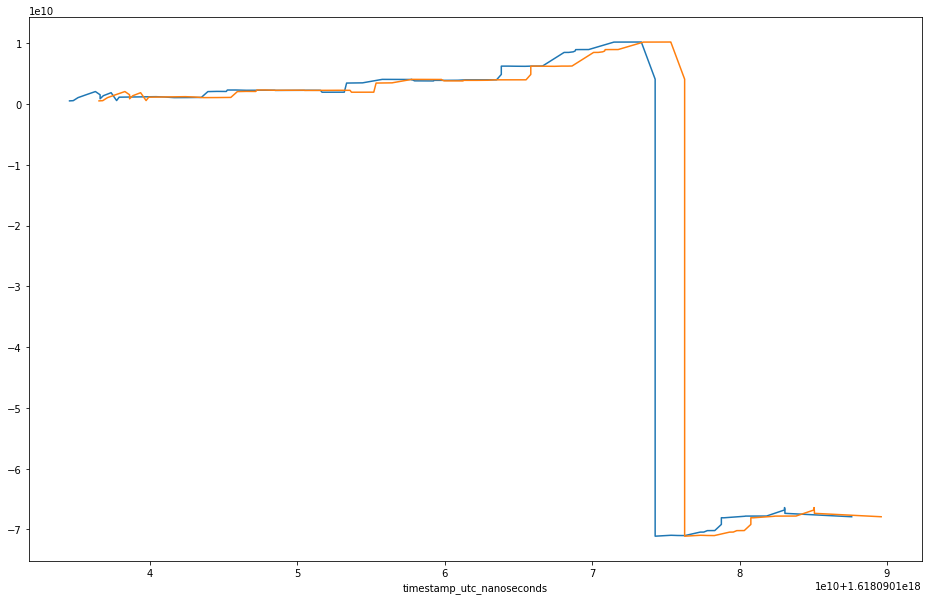

In [19]:
tshi = orig.copy(deep=True)

tshi.index += 2*1e9 # 10 sec
orig.plot()
tshi.plot()

<AxesSubplot:xlabel='timestamp_utc_nanoseconds'>

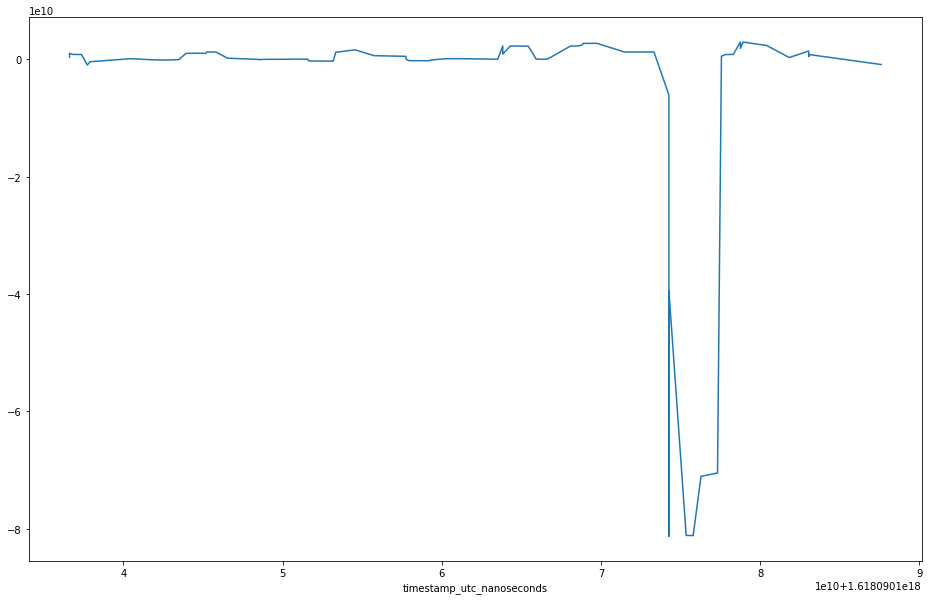

In [20]:
tshi.name = "new"

unholy = pd.concat([orig.to_frame("orig"), tshi.to_frame("new")], axis=0)
unholy.sort_index(inplace=True)
unholy.fillna(method="ffill", inplace=True)

spread = unholy["orig"] - unholy["new"]
spread = spread.loc[orig.index].dropna()

spread.plot()

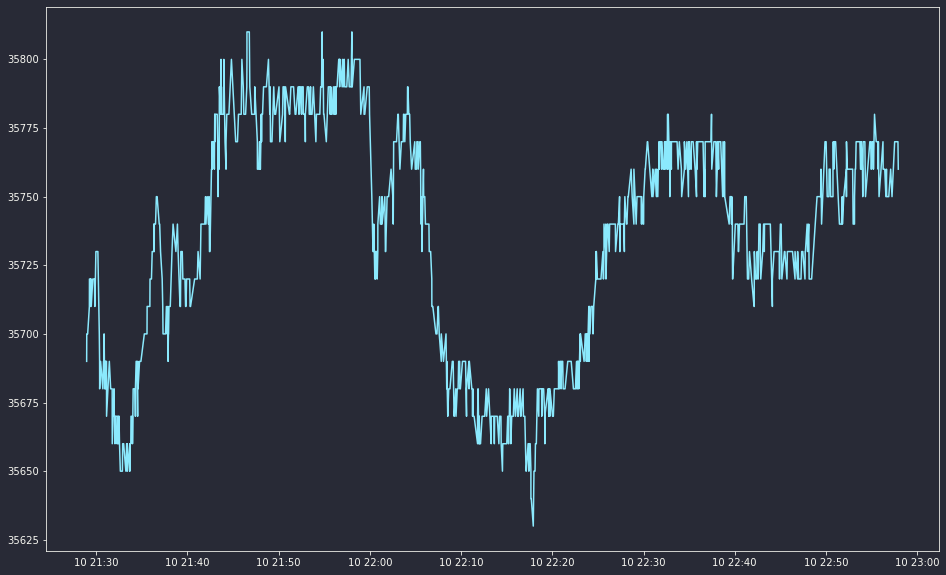

In [21]:
plot_df = trd_raw.iloc[:1000,:]

plt.plot(pd.to_datetime(plot_df["timestamp_utc_nanoseconds"]), plot_df["PriceMillionths"])
plt.show()

<AxesSubplot:ylabel='Frequency'>

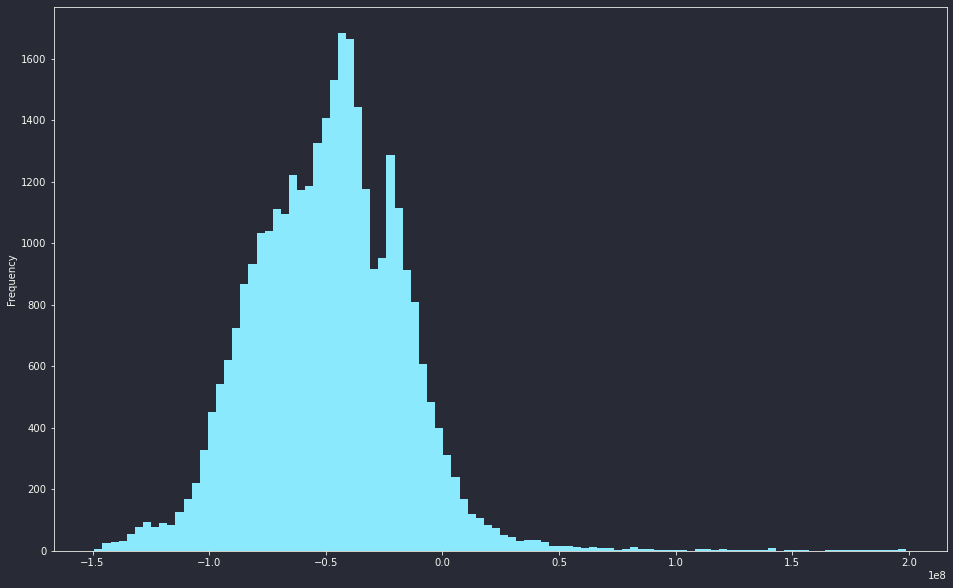

In [23]:
latency = (trd_raw["received_utc_nanoseconds"] - trd_raw["timestamp_utc_nanoseconds"])
latency[np.abs(latency)<2e8].plot.hist(bins=100)
plt.show()

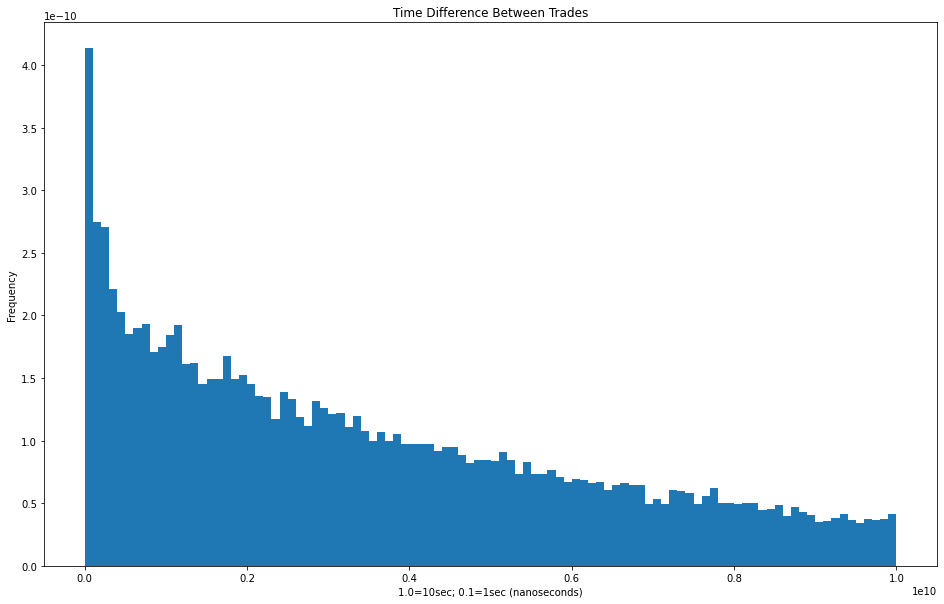

In [5]:
dt = trd_raw["timestamp_utc_nanoseconds"].diff()

dt[(0<dt) & (dt<1e10)].plot.hist(bins=100, density=True)
plt.title("Time Difference Between Trades")
plt.xlabel("1.0=10sec; 0.1=1sec (nanoseconds)")
plt.show()